## Plotting Mean Free Paths in 3-He
### Alya Sharbaugh, Summer 2023

In [449]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [450]:
#En10k -- vector for 10,000 yrs of (n,p)
#Enel -- vector for 10,000 yrs of elastics
#Enlow -- vector for 1 yr of (n,p)
#Enel1x -- vector for 1 yr of elastics

In [451]:
#get some cross section data
import ENDF6
f = open('data/jendl5_3He.endf6')
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=3, MT=2)  # Elastic
x, y = ENDF6.read_table(sec)

sec_np = ENDF6.find_section(lines, MF=3, MT=103)  # Elastic
xnp, ynp = ENDF6.read_table(sec_np)

In [452]:
#densities to convert to macroscopic xn
masshe3 = 3.016 #molar mass

#liquid helium
rholhe3 = 0.0792 #g/cm^3
nlhe3 = (rholhe3/masshe3)*co.N_A

#gaseous helium
rhoghe3 = 0.0007404 #g/cm^3
nghe3 = (rhoghe3/masshe3)*co.N_A

In [453]:
#liquid variables
ESigElMeV = x/1e6
SigElMeV = y*1e-24*nlhe3

ESigMeV = xnp/1e6
SigMeV = ynp*1e-24*nlhe3

#gaseous variables
GESigElMeV = x/1e6
GSigElMeV = y*1e-24*nghe3

GESigMeV = xnp/1e6
GSigMeV = ynp*1e-24*nghe3

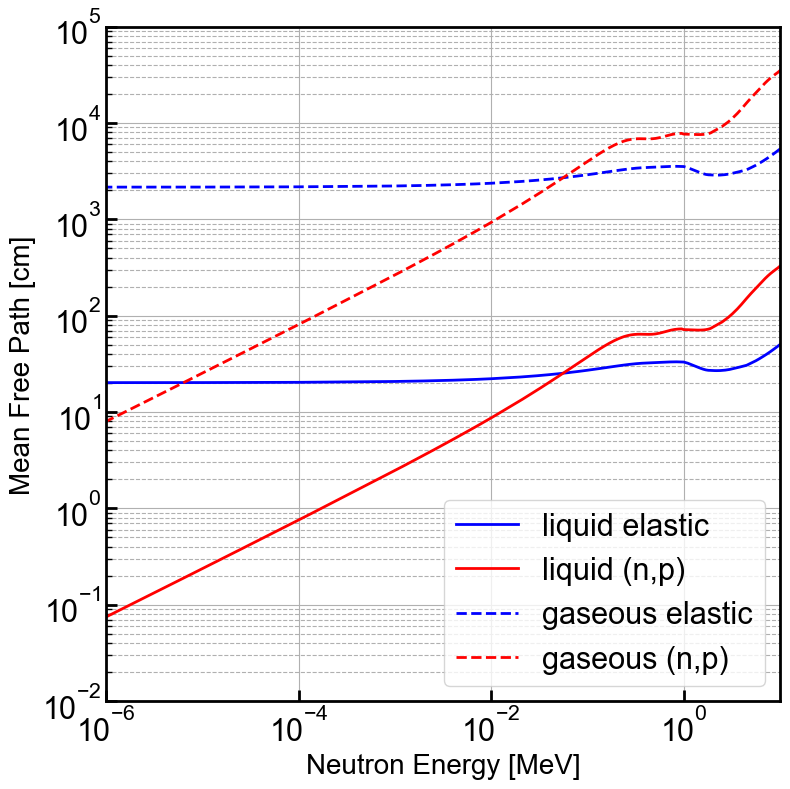

In [454]:
#calculating the mean free path of neutrons in helium
liquid_elastic_mean_free_path = 1/SigElMeV
liquid_np_mean_free_path = 1/SigMeV

gaseous_elastic_mean_free_path = 1/GSigElMeV
gaseous_np_mean_free_path = 1/GSigMeV

# set up plot
fig, ax = plt.subplots(1,1,figsize=(8,8))
# label and style things
ax.set_xlabel(r'Neutron Energy [MeV]', fontsize=20)
ax.set_ylabel('Mean Free Path [cm]', fontsize=20)
#ax.set_title('Mean Free Path of Neutrons in 3-He', fontsize=20)
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.set_xlim(1e-6, 10)
ax.set_ylim(1e-2, 100000)
ax.set_xscale('log')
ax.set_yscale('log')

#print(gaseous_np_mean_free_path)
#print(gaseous_elastic_mean_free_path)

# plot values
ax.plot(ESigElMeV, liquid_elastic_mean_free_path, color = "blue", label = "liquid elastic")
ax.plot(ESigMeV, liquid_np_mean_free_path, color = "red", label = "liquid (n,p)")
ax.plot(GESigElMeV, gaseous_elastic_mean_free_path, "--", color = "blue", label = "gaseous elastic")
ax.plot(GESigMeV, gaseous_np_mean_free_path, "--", color = "red", label = "gaseous (n,p)")
ax.legend()
plt.tight_layout()
#fig.savefig('')
plt.show()

In [455]:
#calculating the mean free path of protons in helium
prange_data = pd.read_csv("data/p-range-helium.txt", skiprows=8, names=['E [MeV]', 'CDSA range [g/cm2]','projected range'], \
                         delim_whitespace=True)
print (prange_data.head(10))

arange_data = pd.read_csv("data/a-range-helium.txt", skiprows=8, names=['E [MeV]', 'CDSA range [g/cm2]','projected range'], \
                         delim_whitespace=True)
print (arange_data.head(10))

   E [MeV]  CDSA range [g/cm2]  projected range
0   0.0010            0.000005         0.000003
1   0.0015            0.000007         0.000004
2   0.0020            0.000009         0.000006
3   0.0025            0.000010         0.000007
4   0.0030            0.000012         0.000008
5   0.0040            0.000015         0.000011
6   0.0050            0.000017         0.000013
7   0.0060            0.000019         0.000015
8   0.0070            0.000021         0.000017
9   0.0080            0.000023         0.000019
   E [MeV]  CDSA range [g/cm2]  projected range
0   0.0010            0.000002         0.000002
1   0.0015            0.000004         0.000003
2   0.0020            0.000005         0.000004
3   0.0025            0.000007         0.000005
4   0.0030            0.000008         0.000006
5   0.0040            0.000011         0.000008
6   0.0050            0.000014         0.000010
7   0.0060            0.000016         0.000013
8   0.0070            0.000019         0

In [456]:
T = np.asarray(prange_data['E [MeV]'])
Tcut = (T<0.85)&(T>0.7)
R = np.asarray(prange_data['CDSA range [g/cm2]'])
Rproj = np.asarray(prange_data['projected range'])

Ta = np.asarray(arange_data['E [MeV]'])
Ra = np.asarray(arange_data['CDSA range [g/cm2]'])
Rproja = np.asarray(arange_data['projected range'])

#calculating range for protons
ppath_liquid = R/rholhe3
ppath_gas = R/rhoghe3

#calculating range for alphas
apath_liquid = Ra/rholhe3
apath_gas = Ra/rhoghe3

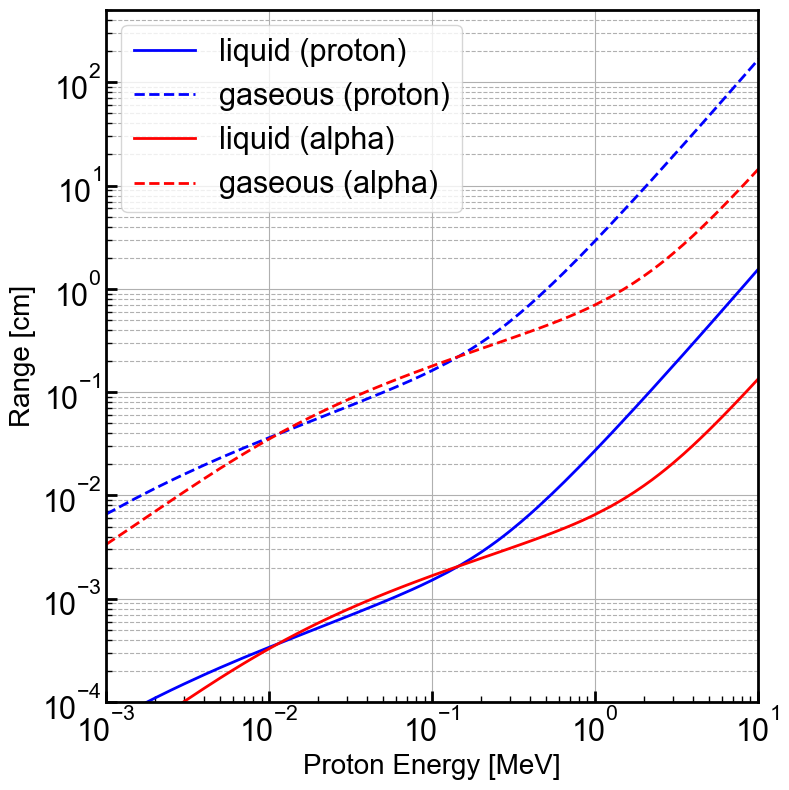

In [457]:
# set up plot
fig, ax = plt.subplots(1,1,figsize=(8,8))
# label and style things
ax.set_xlabel(r'Proton Energy [MeV]', fontsize=20)
ax.set_ylabel('Range [cm]', fontsize=20)
#ax.set_title('Mean Free Path of Protons in 3-He', fontsize=20)
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.set_xlim(1e-3, 10)
ax.set_ylim(1e-4, 5e2)
ax.set_xscale('log')
ax.set_yscale('log')

#print(gaseous_np_mean_free_path)
#print(gaseous_elastic_mean_free_path)

# plot values
ax.plot(T, ppath_liquid, color = "blue", label = "liquid (proton)")
ax.plot(T, ppath_gas, "--", color = "blue", label = "gaseous (proton)")
ax.plot(Ta, apath_liquid, color = "red", label = "liquid (alpha)")
ax.plot(Ta, apath_gas, "--", color = "red", label = "gaseous (alpha)")
ax.legend()
plt.tight_layout()
#fig.savefig('')
plt.show()